<span style="font-family: 'Times New Roman', Times, serif;">
    
# Semester 1 Practice Final Exam - Intermediate Data Programming

<span style="font-family: 'Times New Roman', Times, serif;">
    
## Instructions:
<br>
<span style="font-size: 18px">

**Solutions:** An answer key is provided in Schoology to check your work.

**Use of Resources:** You are allowed to refer to only your class notes on the real exam. However, on the practice you can use any resources to aid your learning. 



## Section 1: Multiple Choice Questions (MCQ)

**The MCQ portion is available as a google form from Schoology**

## Section 2: Query Related Questions 

For this section, you will leverage the data provided in movies.csv to perform the computations asked by the questions. All necessary import statements are provided. DO NOT import any additional libraries.

In [71]:
import pandas as pd



def avg_budget(df):
    '''
    Calculate and return the average budget across all movies.
    Even though there are duplicates, for this question, assume no duplicates.
    '''
    return df['Budget ($)'].mean()
    


def avg_budget_correct(df):
    '''
    Calculate and return the average budget across all movies and handle the fact
    that there are duplicate entries in the DataFrame.
    '''
    df = df.drop_duplicates()
    return df['Budget ($)'].mean()


def count_movies(df):
    '''
    Return the count of unique movie Titles in the dataframe.
    '''
    return len(df.drop_duplicates())


def warner_universal_over_8(df):
    '''
    Filter and return the titles of movies produced by 
    Warner Bros. or Universal Studios that have a rating over 8.0 
    '''
    mask1 = (df['Production Company'] == 'Warner Bros.') | (df['Production Company'] == 'Universal Pictures')
    mask2 = df['Rating'] > 8.0
    df = df[mask1 & mask2]
    return df['Title']


def actress_longer_than_6(df):
    '''
    Return a list of unique actresses that have a last name longer than 6 characters. 
    Sort the names alphabetically, by full name, in reverse. Z->A
    '''
    unique = []
    for actress in df['Actress']:
        print(actress)
        firstlast = actress.split()
        if(len(firstlast[1]) > 6):
            unique.append(actress)
    print(unique)

def top_5_box_office(df):
    '''
    Return the top 5 movies as a Series with the highest box office earnings
    '''
    df = df.sort_values("Box Office ($)",ascending = False)
    df = df[0:5]
    return df['Title']


def avg_budget_1990s(df):
    '''
    Return the average budget for movies released in the 1990s (1990-1999).
    Assure that there are no duplicates.
    '''
    df = df.drop_duplicates()
    mask = (df['Year'] >= 1990) | (df['Year'] <= 1999)
    df = df[mask]
    return df['Budget ($)'].mean()


def box_office_per_genre(df):
    '''
    Return the total box office earnings for each genre as a Series
    '''
    return df.groupby('Genre')['Box Office ($)'].sum()


def highest_avg_director(df):
    '''
    Return the name of the director with the highest average movie rating
    '''
    df = df.groupby('Director')['Rating'].mean().nlargest(1, 'Box Office ($)')
    return df


def top_5_most_movies_by_production_company(df):
    '''
    Return the list of the top 5 production companies with the most movies
    '''
    return df.groupby('Production Company')("Title").count().nlargest(5)
    


def profit_per_movie(df):
    '''
    Calculate the profit (Box Office - Budget) for each movie and add it to a
    new column called 'Profit'. Return the new dataframe.
    '''
    pass


def blockbuster_or_flop(df):
    '''
    Classify each movie as a 'Blockbuster' if its Box Office is at least 200 
    and as a 'Flop' if its Box Office is less than 200. The new column name
    will be 'Success'. Return the new dataframe
    '''
    pass


def top_5_after_2000(df):
    '''
    Return the list of Titles of the top 5 highest rated movies released after the year 2000
    '''
    pass


def run_query_questions(df):
    print(top_5_most_movies_by_production_company(df))


run_query_questions(pd.read_csv('movies.csv'))

TypeError: 'DataFrameGroupBy' object is not callable

## Section 3: Data Visualization Questions
For this section, you will leverage the data provided in movies.csv to create visualizations that best display the information each function asks. All necessary import statements are provided. DO NOT import any additional libraries.

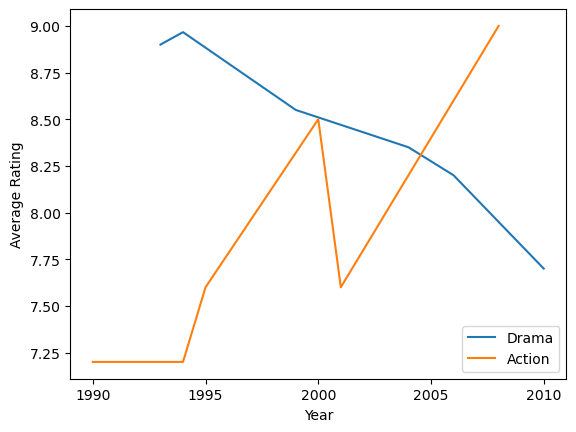

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# NO SEABORN


def movie_ratings_vs_years(df):
    '''
    Create a line plot of the average movie ratings over the years
    '''
    df = df.groupby('Year')['Rating'].mean()
    df.plot(x='Year', y='Rating')


def total_movies_per_production(df):
    '''
    Create a bar graph for the number of movies released by each production company
    '''
    df.groupby('Production Company')

    
def drama_action_rating(df):
    '''
    Create a plot that displays the movie 'Rating' between 1990 and 2010 inclusive.
    Plot two lines, one for the genre 'Drama' and the other for the genre 'Action.' 
    Include a legend. Set the xticks to be every 5 years. Provide an appropriate y-label.
    '''
    df = df[(df['Year'] >= 1990) & (df['Year'] <= 2010)]
    drama = df[df['Genre'] == 'Drama'].groupby('Year')['Rating'].mean()
    drama.plot(x='Year', y='Rating', label ='Drama')
    
    action = df[df['Genre'] == 'Action'].groupby('Year')['Rating'].mean()
    action.plot(x='Year', y='Rating', label ='Action')
    plt.legend()
    plt.xticks(range(1990, 2011, 5))
    plt.ylabel('Average Rating')


def get_timeseries():
    # create DataFrame with hourly index
    df = pd.DataFrame(index=pd.date_range('2020-01-06', '2023-12-27'))
    
    # add a color
    colors = ['orange', 'green', 'blue']
    df['color'] = [ np.random.choice(colors) for n in range(len(df)) ]

    # add column of values
    df['value'] = df.index.year*120 + df.index.month*12 + np.random.randint(0, 200, size=len(df.index))
    df['value'] = df['value'] + df['color'].apply(lambda c: colors.index(c)*20)
    
    return df

    
def weekly_insight(df):
    '''
    df will be a TimeSeries with two columns, 'color' and 'value'.
    By definition, the TimeSeries is indexed by DateTime.
    Plot two lines on the same plot/figure. 
    The first line is the average monthly value for the color 'blue' across all data.
    The second line is the average monthly value for the color 'orange' across all data.
    Give the plot a title and label the axes.
    Show a legend.
    '''
    pass


def run_visualizations(filename):
    df = pd.read_csv(filename)
    # movie_ratings_vs_years(df)
    # total_movies_per_production(df)
    drama_action_rating(df)
    # weekly_insight(get_timeseries())


run_visualizations('movies.csv')

<span style="font-family: 'Times New Roman', Times, serif;">

## Section 4: Algorithmic Question
You are to solve this question withOUT Pandas. 

Let's represent a list of nodes using a dictionary where the key is the node name and the value is a tuple: (next node key, string). They keys for the nodes are strings in the following format: `n#`. For example:  'n1', 'n2', 'n3', 'n4'  ... 'n101', 'n102'.  
    
The first node's key could be 'n1' which might then have the value ('n2', 'Hello'). This would mean that the next node to travel to would be 'n2'. Let's say that 'n2' has the value (None, 'there!'), then our list would be complete because the first Tuple has value `None`. 
    
Write a method, generate_sentence, that accepts two arguments: name of the start node, and the dictionary just described that represents this list of nodes. The method will return the sentence composed by following the nodes to the end. 

There is one more twist! If any word appears more than once, exclude the word from the final sentence; it will appear only the first time.
    
```python
# Example usage:
nodes = {
    'n1': ('n2', 'My'),
    'n2': ('n3', 'name'),
    'n3': ('n4', 'is'),
    'n4': (None, 'Mr. name Ed!')
}

sentence = generate_sentence('n1', nodes)
print(sentence)  # Output: 'My name is Mr. Ed!'
```

In [ ]:
def generate_sentence(start_node, nodes):
    pass

def test_generate_sentence():
    nodes = {
        'n1': ('n2', 'My'),
        'n2': ('n3', 'name'),
        'n3': ('n4', 'is'),
        'n4': (None, 'Mr. name Ed!')
    }
    print(generate_sentence('n1', nodes))
    
test_generate_sentence()